# Random Forest 

In [1]:

# Author: Arnova Abdullah
# Date: 15-05-2022
# Description: Code for creating and evaluating Random Forest Model for stratified training set(using loudness_cat)


## Importing modules

In [21]:
# Run this cell to import the following modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# Importing modules for Random Forest evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc

In [34]:
# Importing modules for performance evaluation

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt

## Loading data 

In [25]:
# Loading training data set
df = pd.read_csv('data/loudness_train.csv')
df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.736,0.45800,-7.437,1,0.0316,0.44100,0.000000,0.1480,0.6500,98.977,4,country
1,0.539,0.70200,-7.291,1,0.0436,0.00245,0.000024,0.1170,0.2060,118.106,4,rock
2,0.834,0.68500,-5.862,0,0.2250,0.09980,0.000000,0.0514,0.8770,95.507,4,dance
3,0.468,0.71500,-3.101,0,0.0558,0.00202,0.733000,0.0870,0.6000,141.010,4,blues
4,0.253,0.00429,-36.172,0,0.0523,0.99000,0.912000,0.1030,0.0368,74.497,3,classical


In [39]:
df_test = pd.read_csv ('data/loudness_test.csv')
df_test.head ()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.492,0.264,-18.304,1,0.0579,0.893,0.00411,0.9400,0.4760,102.091,4,blues
1,0.401,0.140,-22.696,1,0.0338,0.990,0.92900,0.0780,0.3260,130.037,4,classical
2,0.467,0.619,-6.046,0,0.0345,0.216,0.00000,0.0886,0.3460,167.907,4,country
3,0.353,0.254,-16.205,1,0.0349,0.948,0.85900,0.0843,0.0986,133.808,4,classical
4,0.339,0.354,-14.257,1,0.0309,0.153,0.57100,0.1080,0.6130,136.384,4,rock


## Picking out important features

In [26]:
# Keeping columns energy, loudness, acousticness and instrumentalness, dropping the rest
columns = ['danceability', 'mode', 'liveness', 'speechiness', 'valence', 'tempo', 'time_signature', 'genre']
X_train = df.drop(columns, axis=1)
y_train, levels = pd.factorize(df['genre']) # Encoding categorical data to numeric categories

In [40]:
# Keeping columns energy, loudness, acousticness and instrumentalness, dropping the rest
columns = ['danceability', 'mode', 'liveness', 'speechiness', 'valence', 'tempo', 'time_signature', 'genre']
X_test = df_test.drop(columns, axis=1)
y_test, levels = pd.factorize(df_test['genre']) # Encoding categorical data to numeric categories

## Training the model using Random Forest

In [31]:
# Using OneVsRestClassifier to train training set
model = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
model.fit (X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_features=0.2))

## Performance evaluation

### 1. Accuracy Score measurement (Training set)

In [32]:
y_train_pred = model.predict (X_train)
train_accuracy = accuracy_score (y_true = y_train, y_pred = y_train_pred)
train_accuracy

0.9222916666666666

### 2. Accuracy Score measurement (Test set)

In [41]:
y_test_pred = model.predict (X_test)
test_accuracy = accuracy_score (y_true = y_test, y_pred = y_test_pred)
test_accuracy

0.11541666666666667

### 3. Confusion matrix evaluation

In [66]:
print(confusion_matrix(y_train, y_train_pred))

[[932  29   5   5   0   3   0   0   0   2]
 [ 37 694  23  36   0 103   0   6   0  65]
 [  2  11 830   0   0  90   5   0   0   3]
 [  1  19   0 919   2   3   0  10  13   1]
 [  0   0   0   0 972   0   0   0   2   0]
 [  2  79 103   4   0 756   1   2   1  10]
 [  0   0   1   0   1   0 937   0   1   0]
 [  1   2   3  17   0   1   0 935   0   0]
 [  0   0   0   6   3   0   1   0 953   0]
 [  0  21   1   2   0   7   0   0   0 926]]


<AxesSubplot:xlabel='col_0', ylabel='row_0'>

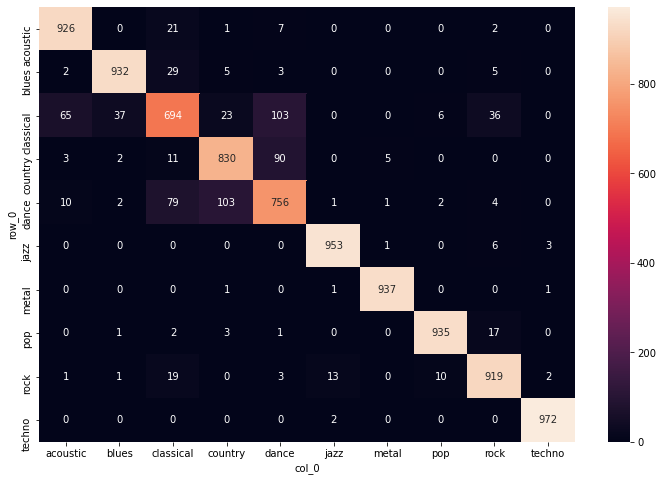

In [54]:
cf_matrix = pd.crosstab(levels[y_train],levels[y_train_pred])
plt.figure(figsize=(12,8))
heatmap(cf_matrix, annot=True, fmt='g')

### 4. Cross validation

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [67]:
cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

array([0.3740625, 0.3828125, 0.3965625])